# Sparks Foundation Task 2

## Prediction using Unsupervised Learning 

From given 'Iris' dataset, predict optimum number of clusters and represent it visually

## Author: Trisha Sharma 

## Data Science and Business Analytics Intern May'21 

In [1]:
#importing all the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

## Getting the Data

In [2]:
#importing the dataset
iris= pd.read_csv('Iris.csv')
#getting rows from dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Preparing Data for Prediction

In [3]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
#defining target which are the 4 features of dataset
x=iris[['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values
#defining target
y=iris['Species'].values

## Elbow method to find optimal number of clusters 

In [5]:
Range=range(1,10)
Sum_of_squared_errors=[]
for i in Range:
    km=KMeans(n_clusters=i)
    km.fit(x)
    Sum_of_squared_errors.append(km.inertia_)

## Output Graph of Elbow Method 

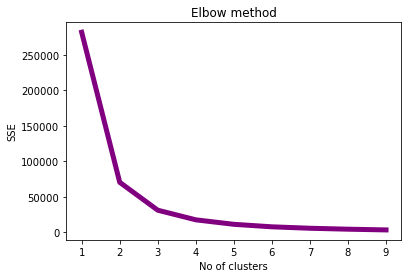

In [10]:
plt.plot(range(1, 10), Sum_of_squared_errors, color='purple',linewidth=5)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('SSE')
plt.show()

the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

## K-means clustering with number of clusters = 3 

In [15]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans_3=KMeans(n_clusters=3)
kmeans_3.fit(x)
KMeans(n_clusters=3)
kmeans_3.cluster_centers_

array([[ 25.5  ,   5.006,   3.418,   1.464,   0.244],
       [125.5  ,   6.588,   2.974,   5.552,   2.026],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ,   1.326]])

In [12]:
predicted_clusters=kmeans_3.fit_predict(x)
predicted_clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

## Visualization of Clustering

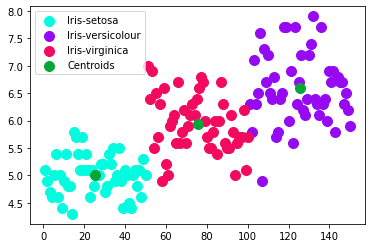

In [21]:
# Visualising the clusters - On the first two columns
plt.scatter(x[predicted_clusters == 0, 0], x[predicted_clusters == 0, 1], 
            s = 100, c = '#03fcdf', label = 'Iris-setosa')
plt.scatter(x[predicted_clusters == 1, 0], x[predicted_clusters == 1, 1], 
            s = 100, c = '#950af2', label = 'Iris-versicolour')
plt.scatter(x[predicted_clusters == 2, 0], x[predicted_clusters == 2, 1],
            s = 100, c = '#f20a5f', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_3.cluster_centers_[:, 0], kmeans_3.cluster_centers_[:,1], 
            s = 100, c = '#07a639', label = 'Centroids')

plt.legend()
plt.show()